In [1]:
import pandas as pd

results_file = "../../css_lookahead_3/model_batch_nr_1000.json.result"
label_file = "july_week_5_test.dat.labels.txt"

background_label = "0"

results_df = pd.read_csv(results_file, delimiter=";")
results_df

,row nr,abbadingo trace,state sequence,score sequence,sum scores,mean scores,min score
0,1,"""1 1 115""","[1,1]","[-2.26448,-6.48784]",-8.75232,-4.37616,-6.48784
1,1,"""1 20 129 129 129 115 171 115 129 129 129 129...","[2,28,166,253,-1]","[-2.2001,-0.0197557,-0.00888007,-7.89776,-2.1...",-12.28600,-2.45720,-7.89776
2,1,"""1 20 129 129 115 171 115 129 129 129 129 129...","[2,28,165,-1]","[-2.2001,-0.0197557,-7.23861,-2.46385]",-11.92230,-2.98058,-7.23861
3,1,"""1 20 129 115 171 115 129 129 129 129 129 129...","[2,27,162,-1]","[-2.2001,-6.04647,-2.41178,-1.65823]",-12.31660,-3.07914,-6.04647
4,1,"""1 20 115 171 115 129 129 129 129 129 129 129...","[1,13,301,442,-1]","[-2.26448,-3.09597,-0.531645,-5.70844,-0.980829]",-12.58140,-2.51627,-5.70844
...,...,...,...,...,...,...,...
10288879,1,"""1 1 199""","[7,7]","[-5.9158,-7.21818]",-13.13400,-6.56699,-7.21818
10288880,1,"""1 1 199""","[7,7]","[-5.9158,-7.21818]",-13.13400,-6.56699,-7.21818
10288881,1,"""1 1 199""","[7,7]","[-5.9158,-7.21818]",-13.13400,-6.56699,-7.21818
10288882,1,"""1 1 199""","[7,7]","[-5.9158,-7.21818]",-13.13400,-6.56699,-7.21818


In [2]:
mean_scores = results_df[" mean scores"]
min_scores = results_df[" min score"]

del results_df

In [3]:
import numpy as np

labels = list()
for line in open(label_file, "rt"):
    if line.split()[-1] != background_label:
        labels.append(1)
    else:
        labels.append(0)
        
labels = np.array(labels)
np.unique(labels, return_counts=True)

(array([0, 1]), array([9474799,  814085]))

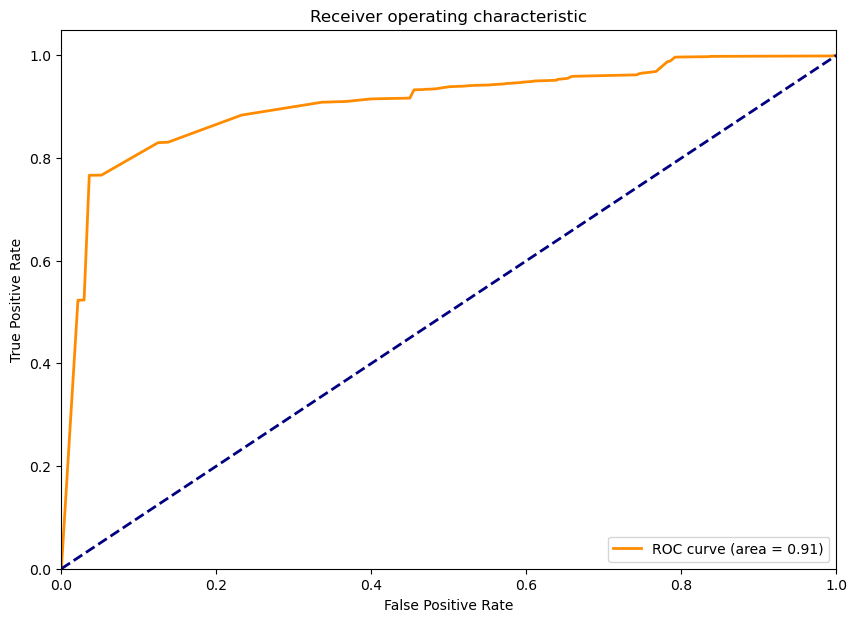

In [4]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

score = mean_scores

fpr, tpr, thresholds = roc_curve(labels, score)
roc_auc = roc_auc_score(labels, score)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")

# Do the CSS files, check per input

Batch nr  2000
Plotting


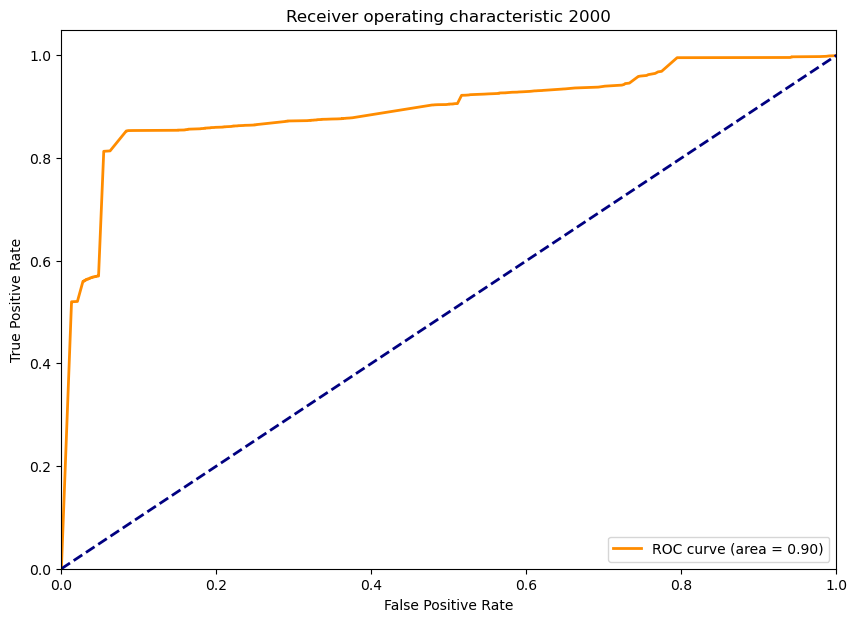

Batch nr  5000
Plotting


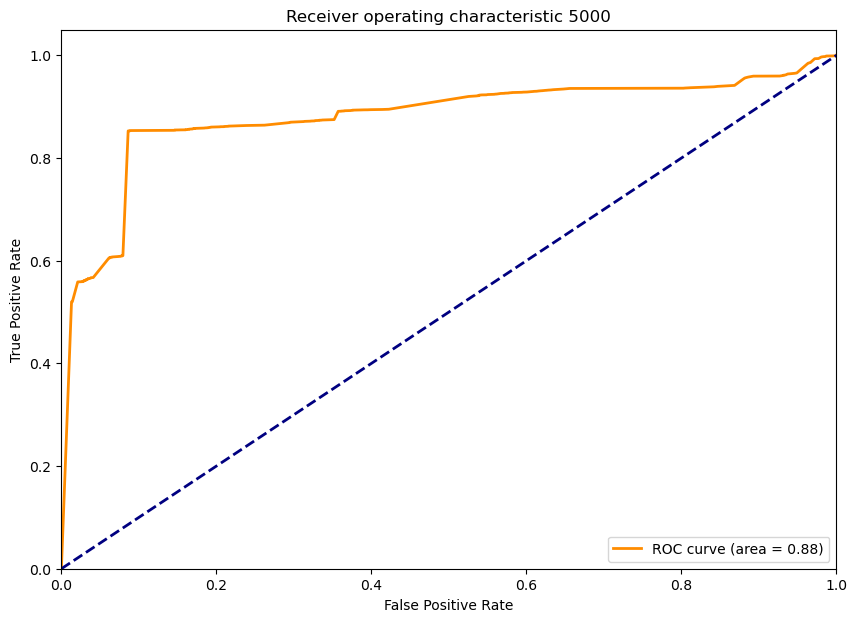

Batch nr  10000
Plotting


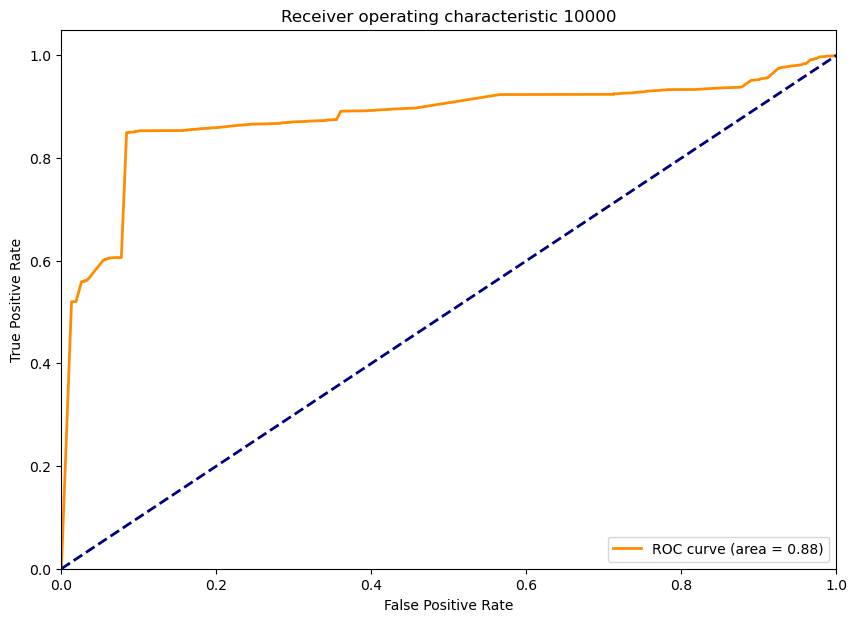

In [5]:
import os

base_dir = "../.."

for i in [2, 5, 10]: #range(1, 20):
    batch_nr = str(int(i*1000))
    if i == 4:
        continue
    results_file = "model_batch_nr_{}.json.result".format(batch_nr)

    print("Batch nr ", batch_nr)
    results_df = pd.read_csv(os.path.join(base_dir, results_file), delimiter=";")

    mean_scores = results_df[" mean scores"]
    min_scores = results_df[" min score"]

    del results_df

    from sklearn.metrics import roc_curve, auc, roc_auc_score

    score = mean_scores

    fpr, tpr, thresholds = roc_curve(labels, score)
    roc_auc = roc_auc_score(labels, score)

    import matplotlib.pyplot as plt
    import seaborn as sns

    print("Plotting")
    plt.figure(figsize=(10, 7))
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic {}".format(batch_nr))
    plt.legend(loc="lower right")
    plt.show()